In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

Loading Dataset

In [3]:
df = pd.read_csv('women_clothing_ecommerce_sales.csv')
df.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


Exploaratory Data Analysis:dividing our EDA into two types:Visual and Numerical.
starting off with the Numerical part:

In [4]:
df.shape

(527, 8)

In [5]:
df.columns

Index(['order_id', 'order_date', 'sku', 'color', 'size', 'unit_price',
       'quantity', 'revenue'],
      dtype='object')

In [6]:
df.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


Dealing with types

In [7]:
df.dtypes

order_id       int64
order_date    object
sku           object
color         object
size          object
unit_price     int64
quantity       int64
revenue        int64
dtype: object

In [8]:
#df['order_date'] = pd.to_datetime(df['order_date'])
#df =df.set_index('order_date')

Handle NA values

In [9]:
#checking for columns with there respective numbers of empty raw values
df.isnull().sum()

order_id       0
order_date     0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
dtype: int64

In [10]:
#drop the na_values raws since they insignificant as compared to our 527 raws
df = df.dropna()
df.isnull().sum()

order_id      0
order_date    0
sku           0
color         0
size          0
unit_price    0
quantity      0
revenue       0
dtype: int64

Drop features that are not required to build our model

In [11]:
df = df.drop(['order_id','order_date'],axis='columns')
df.head()

,sku,color,size,unit_price,quantity,revenue
0,708,Dark Blue,2XL,298,1,298
1,89,Dark Blue,2XL,258,1,258
2,bobo,Cream,One Size,228,1,228
3,799,Dark Blue,XL,264,1,264
4,799,Dark Blue,M,264,1,264


checking out columns separately
Also it makes sense to go feature by feature and check what pitfalls we 
have in our data and also to understand our numbers better.

stock keep unit column

In [12]:
df['sku'].value_counts().tail()

sku
1499    2
229     2
539     2
29      1
628     1
Name: count, dtype: int64

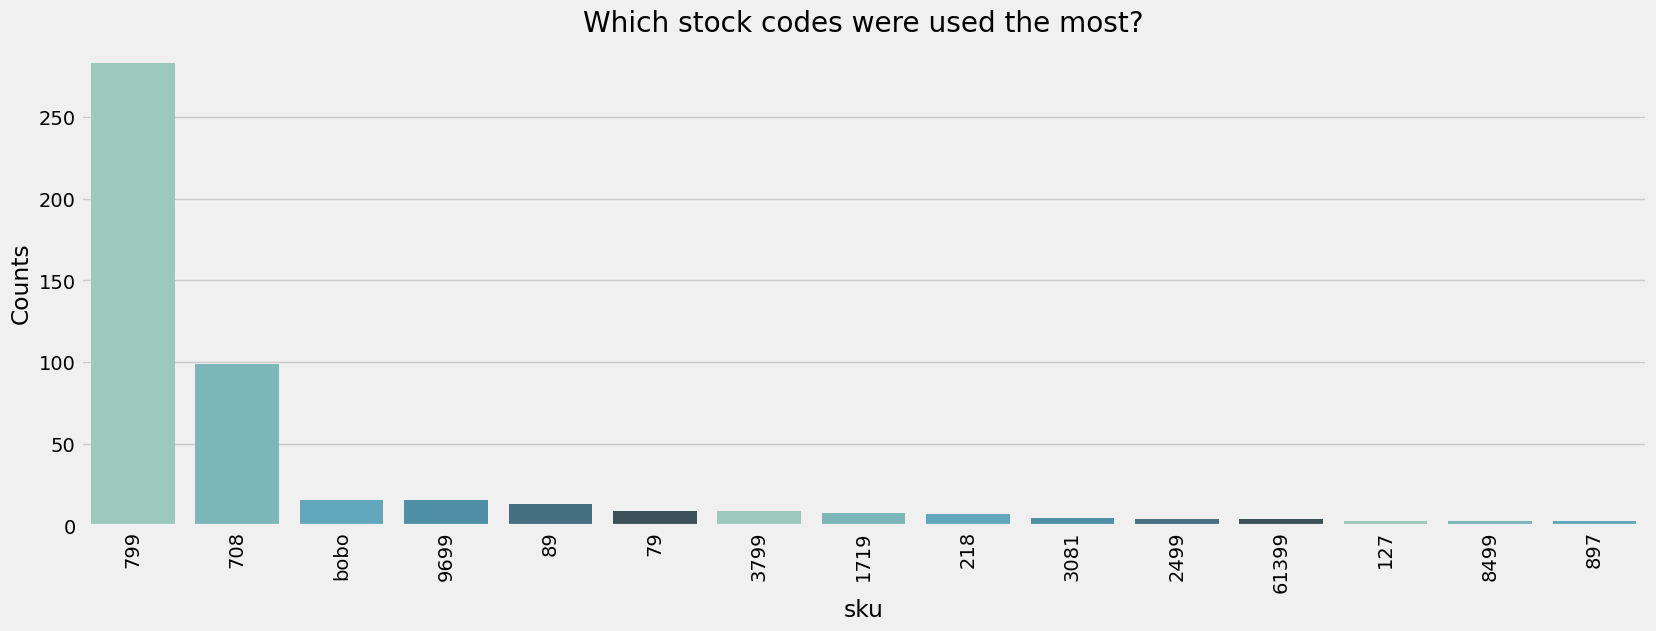

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_counts = df['sku'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(18, 6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?")
plt.xticks(rotation=90);  # Rotate x-axis labels for better readability
plt.show()


Color feature

In [14]:
df['color'].value_counts().tail()

color
Brown              1
Cornflower Blue    1
Pink               1
Red Orange         1
Gray Stripes       1
Name: count, dtype: int64

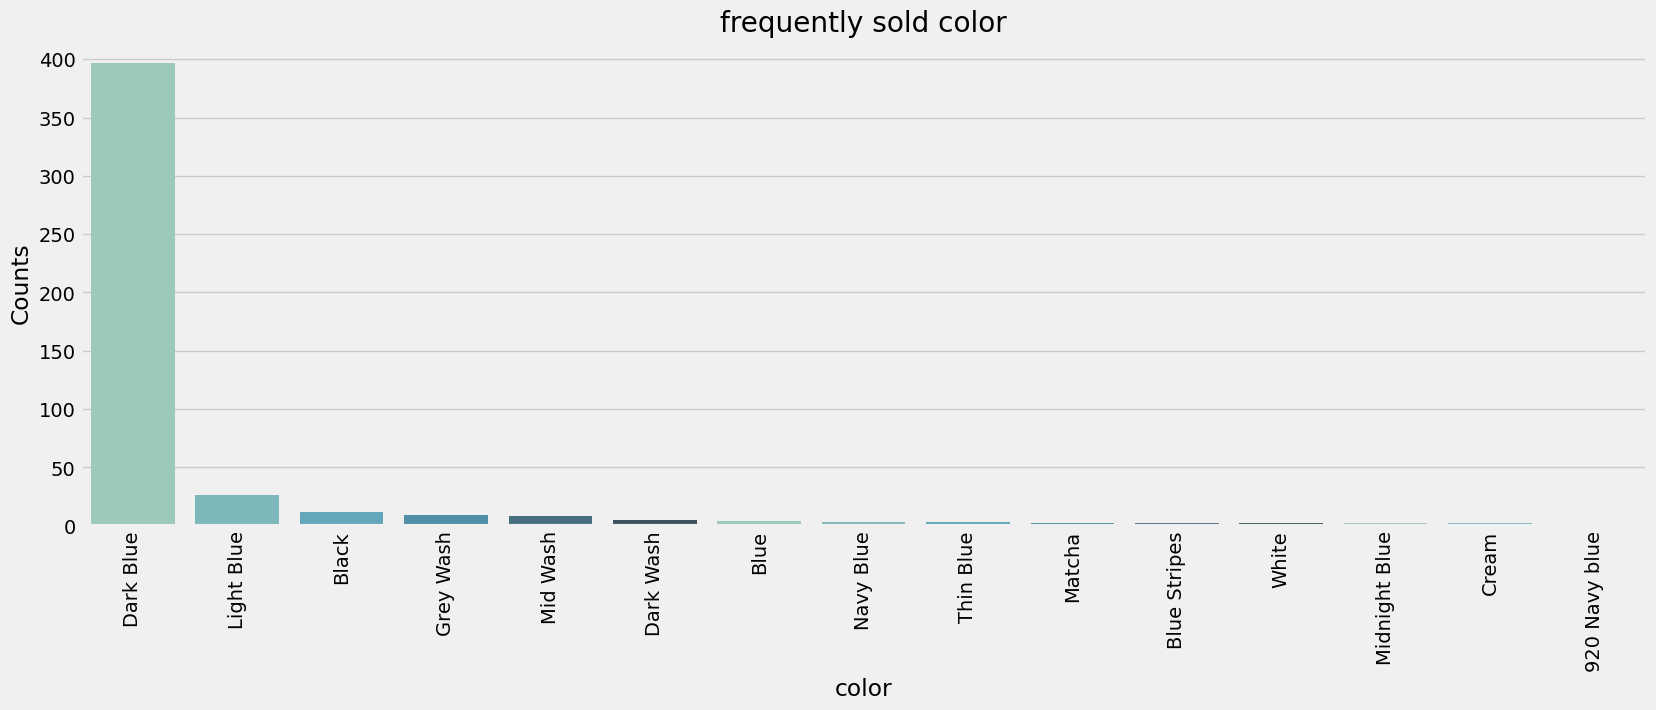

In [15]:

color_count = df['color'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(18, 6))
sns.barplot(x=color_count.index, y=color_count.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("frequently sold color")
plt.xticks(rotation=90); # Rotate x-axis labels for better readability
plt.show()

checking out the size feature

In [16]:
df['size'].value_counts().head()

size
XL          164
M            92
L            91
One Size     45
2XL          43
Name: count, dtype: int64

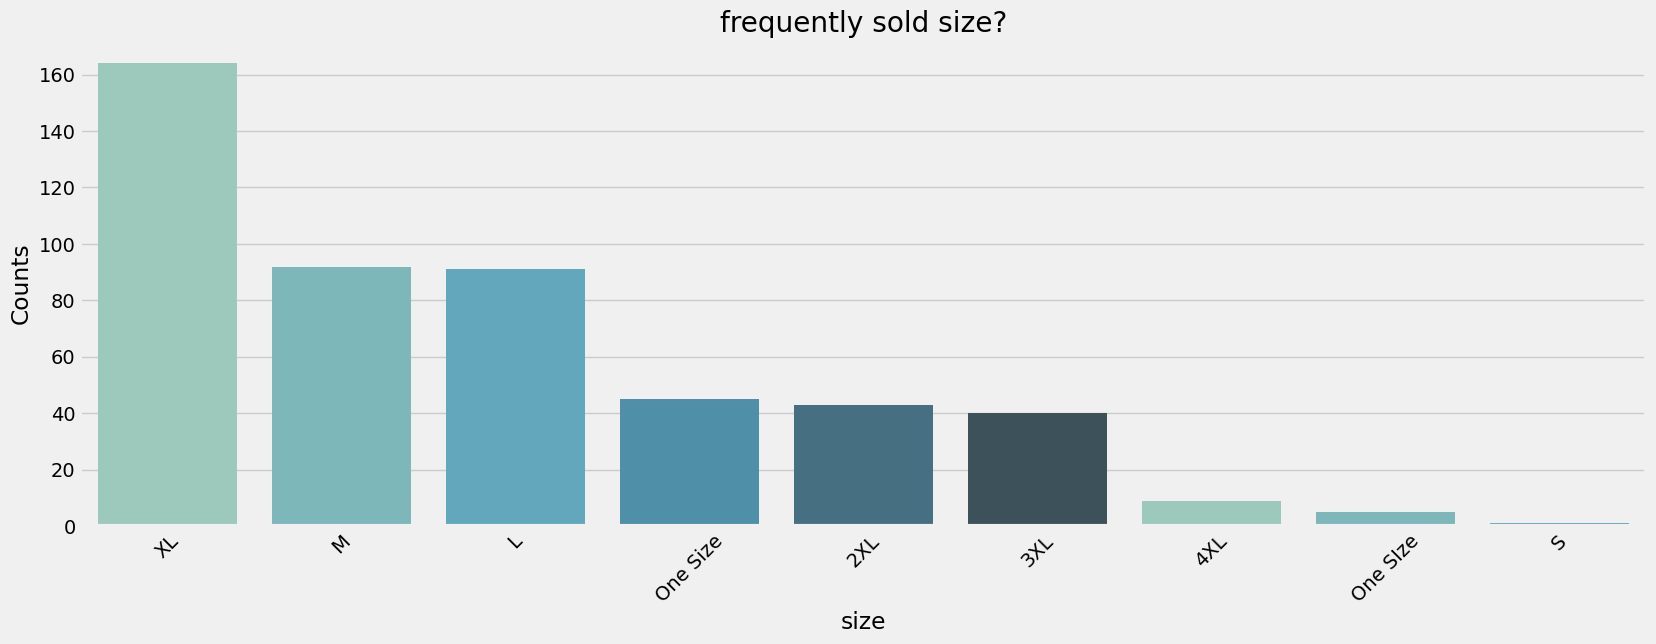

In [17]:

size_counts = df['size'].value_counts().sort_values(ascending=False).iloc[0:15]

plt.figure(figsize=(18, 6))
sns.barplot(x=size_counts.index, y=size_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("frequently sold size?")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Detecting outliners
There are few different methods to detect outliers: box plots, using IQR, scatter plot also works in some cases (and this is one of those). Also, detecting outliers using scatter plot is pretty intuitive. You plot your data and remove data points that visually are definitely out of range. Like in the chart below.

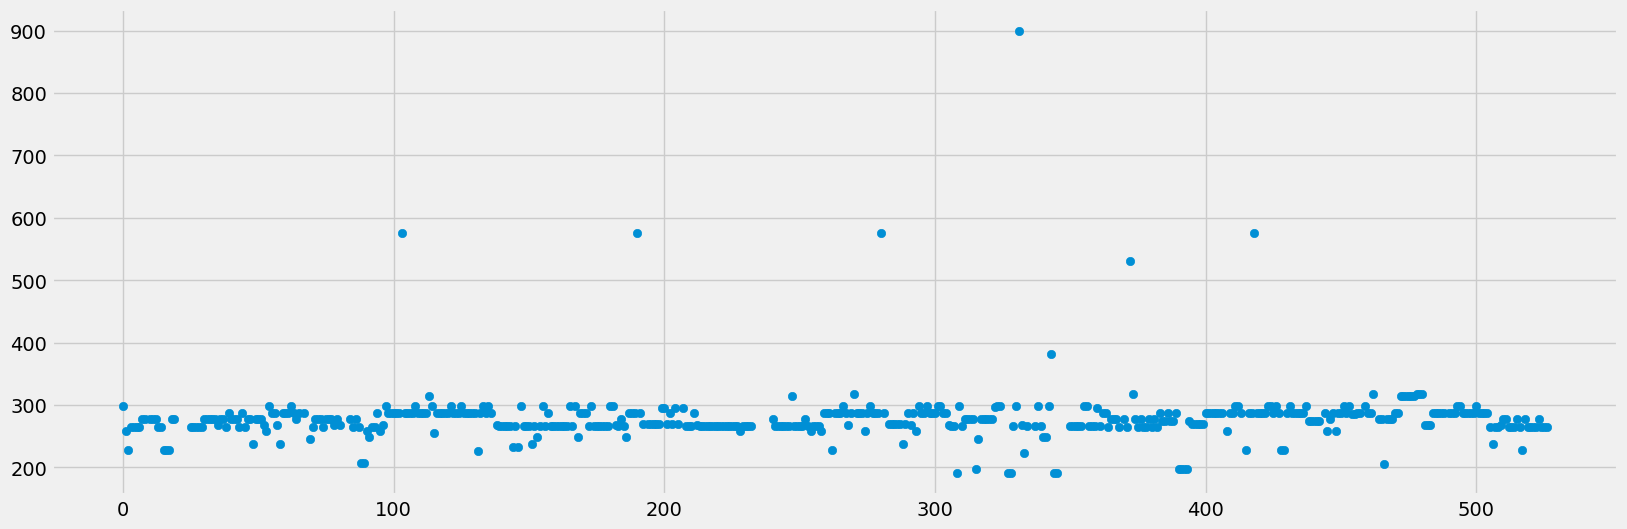

In [18]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['revenue'])

Let's remove obvious outliers

In [19]:
df.revenue.describe()

count    490.000000
mean     279.434694
std       45.858376
min      191.000000
25%      266.000000
50%      278.000000
75%      288.000000
max      899.000000
Name: revenue, dtype: float64

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

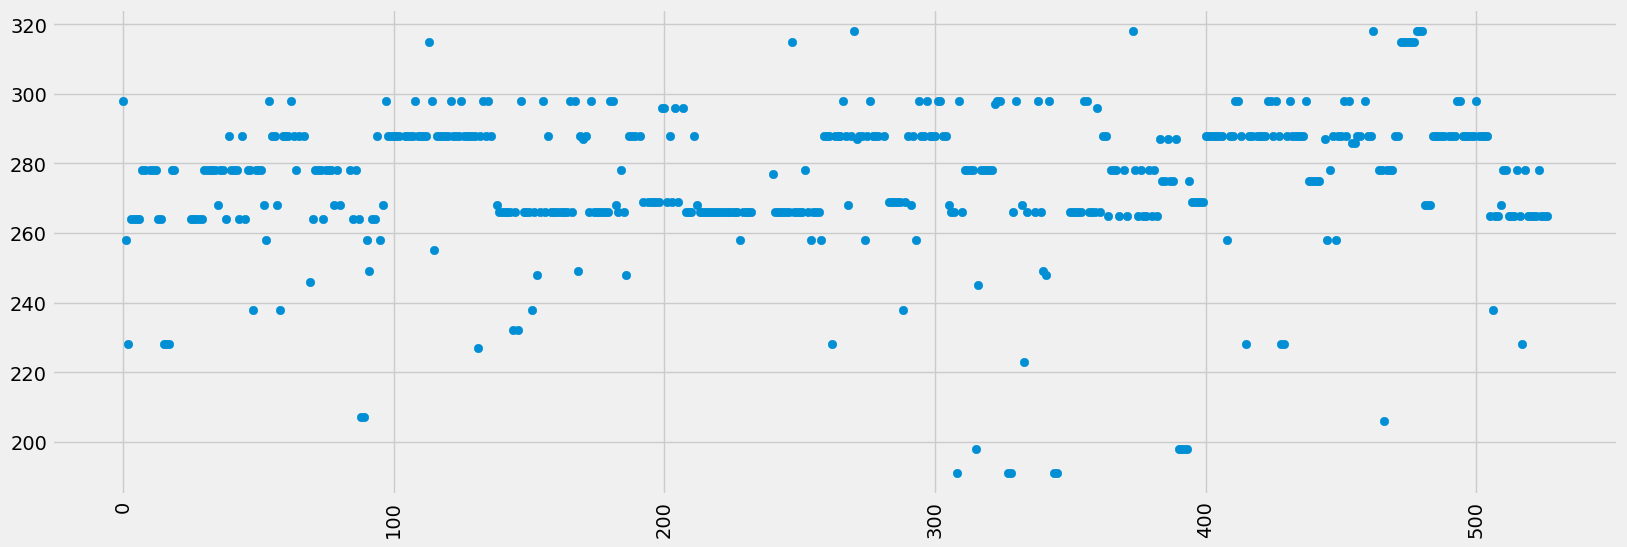

In [25]:
df = df[df['revenue'] < 375]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['revenue'])
plt.xticks(rotation=90)

After removing obvious outliers we still see some values that are out of normal distribution. To understand better the distribution of our data let's check out different percentiles of our numeric features.

In [21]:
df[['revenue', 'unit_price', 'quantity']] = df[['revenue', 'unit_price', 'quantity']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the specified columns
df = df.dropna(subset=['revenue', 'unit_price', 'quantity'])

# calculating quantiles again for each column separately
quantiles_revenue = df['revenue'].quantile([0.05, 0.95, 0.98, 0.99, 0.999])
quantiles_unit_price = df['unit_price'].quantile([0.05, 0.95, 0.98, 0.99, 0.999])
quantiles_quantity = df['quantity'].quantile([0.05, 0.95, 0.98, 0.99, 0.999])
print(quantiles_quantity,quantiles_unit_price,quantiles_revenue)

0.050    1.0
0.950    1.0
0.980    1.0
0.990    2.0
0.999    2.0
Name: quantity, dtype: float64 0.050    229.6
0.950    298.0
0.980    315.0
0.990    318.0
0.999    318.0
Name: unit_price, dtype: float64 0.050    232.00
0.950    298.00
0.980    318.00
0.990    399.76
0.999    576.00
Name: revenue, dtype: float64


In [22]:
"""unique_values = df['quantity'].unique()
print(unique_values)"""

"unique_values = df['quantity'].unique()\nprint(unique_values)"